In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipdb
import glob

In [3]:
file_list = glob.glob('cluster_ratio_res/*.csv')
df = pd.read_csv(file_list[0],index_col=0)

4


/tmp/ipykernel_2323049/2727305074.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


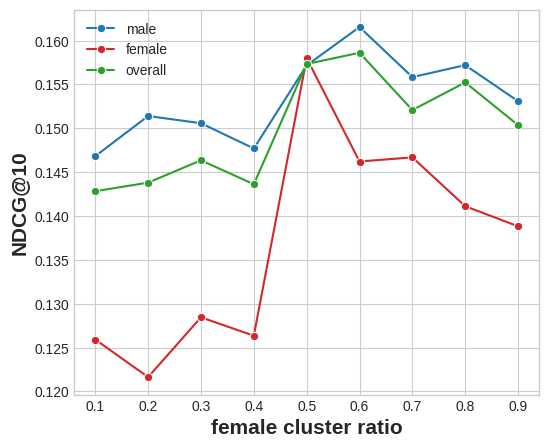

In [10]:
# mean_df = df.groupby(["cluster_ratio"]).mean().reset_index()
plt.style.use('seaborn-whitegrid')
pallete = sns.color_palette("tab10")
for file in file_list:
    for seed in range(0,5):
        if "drama_sci-fi" in file and seed==4:
            print(seed)
            df = pd.read_csv(file,index_col=0)
            new_df = df[df['seed']==seed].reset_index(drop=True)
            plt.figure(figsize=(6,5))
            sns.lineplot(data=new_df, x='cluster_ratio', y='test_Y_NDCG_10_male',label="male",marker="o",color = pallete[0])
            sns.lineplot(data=new_df, x='cluster_ratio', y='test_Y_NDCG_10_female',label="female",marker="o",color = pallete[3])
            sns.lineplot(data=new_df, x='cluster_ratio', y='test_Y_NDCG_10',label="overall",marker="o",color = pallete[2])
            # plt.title(f"{file.split('/')[-1].split('.')[0]}")
            file_name = file.split('/')[-1][:-4].split("_")
            # plt.title(rf'{file_name[0].capitalize()} $\rightarrow$ {file_name[1].capitalize()}', fontsize=16, fontweight='bold', x=0.5, y=1.05)
            plt.xlabel("female cluster ratio",fontsize=15,fontweight='bold')
            plt.ylabel("NDCG@10",fontsize=15,fontweight='bold')
            plt.show()

/tmp/ipykernel_2313192/3430901227.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


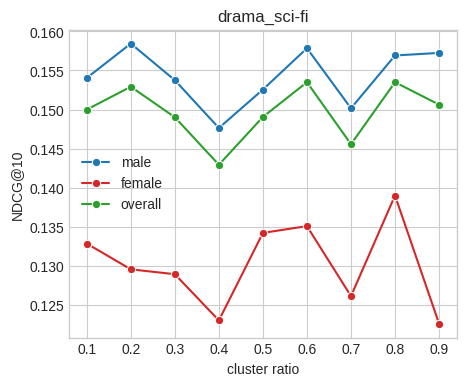

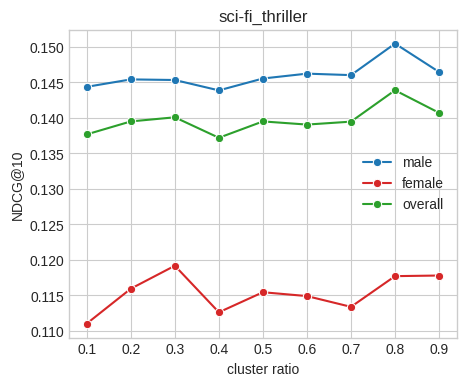

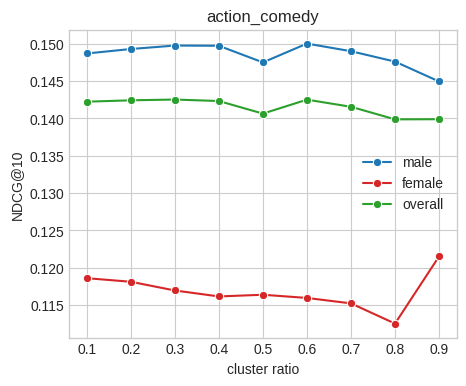

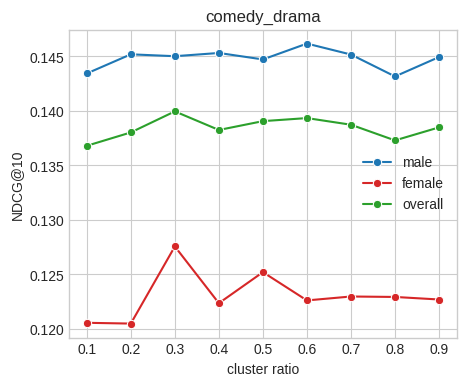

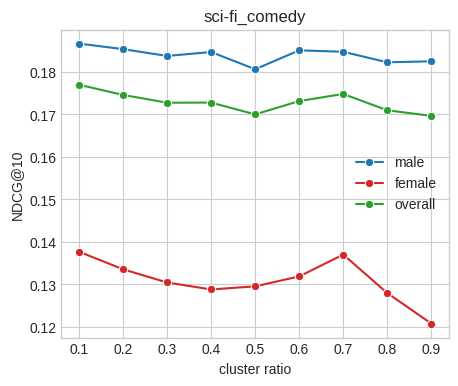

In [10]:
plt.style.use('seaborn-whitegrid')
pallete = sns.color_palette("tab10")
for file in file_list:
    df = pd.read_csv(file,index_col=0)
    # new_df = df[df['seed']==seed].reset_index(drop=True)
    new_df = df.groupby(["cluster_ratio"]).mean(numeric_only =True).reset_index()
    plt.figure(figsize=(5,4))
    sns.lineplot(data=new_df, x='cluster_ratio', y='test_Y_NDCG_10_male',label="male",color=pallete[0],marker="o")
    sns.lineplot(data=new_df, x='cluster_ratio', y='test_Y_NDCG_10_female',label="female",color=pallete[3],marker="o")
    sns.lineplot(data=new_df, x='cluster_ratio', y='test_Y_NDCG_10',label="overall",color=pallete[2],marker="o")
    plt.title(f"{file.split('/')[-1].split('.')[0]}")
    plt.xlabel("cluster ratio")
    plt.ylabel("NDCG@10")